In [23]:
import numpy as np

import numpy.random as npr


import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [27]:
#Données

Angle0 = 123+55.0/60 #Angle de l'ordre 0

#Dm = angle par rapport à l'angle 0 au minimum de déviation /// p = ordre de la raie

Dm_violet = np.array([131+18.0/60, 138+4.0/60, 116+20.0/60, 108 + 38.0/60]) - Angle0
Dm_violet = Dm_violet * 2*np.pi/360
p_violet = np.array([1, 2, -1, -2])

Dm_bleu = np.array([132+11.0/60, 140+29.0/60, 148+56.0/60, 158+3.0/60, 115+29.0/60, 106+39.0/60, 97+15.0/60, 86+32.0/60, 73+26.0/60]) - Angle0
Dm_bleu = Dm_bleu * 2*np.pi/360
p_bleu = np.array([1, 2, 3, 4, -1, -2, -3, -4, -5])

Dm_rouge = np.array([135 + 4.0/60, 146+27.0/60, 158+39.0/60, 112+25.0/60, 100+8.0/60, 85+59.0/60, 66+37.0/60]) - Angle0
Dm_rouge = Dm_rouge * 2*np.pi/360
p_rouge = np.array([1, 2, 3, -1, -2, -3, -4])

dDm = 5.0/60


a = 10**-3 / 300 #Pas de réseau
da = a*10**-2

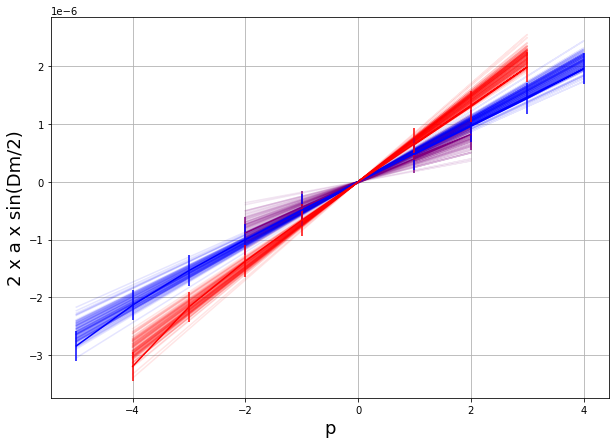

4.224152577466889e-07 +- 8.692885806168627e-08
5.217561660808515e-07 +- 3.089952193570387e-08
7.270040692628146e-07 +- 4.0178301031606066e-08


In [28]:
#Monte-Carlo
def f_lin(x,a):
    return a*x

N_mc = 100 # nombre de simulations

param_violet = np.zeros((1, N_mc))
param_bleu = np.zeros((1, N_mc))
param_rouge = np.zeros((1, N_mc))


for i in range(N_mc):
    
    Dm_violet_mc = np.array([])
    Dm_bleu_mc = np.array([])
    Dm_rouge_mc = np.array([])
    
    a_violet_mc = np.array([])
    a_bleu_mc = np.array([])
    a_rouge_mc = np.array([])
    
    for k in range (len(p_violet)) :
        
        Dm_violet_mc = np.append(Dm_violet_mc, npr.normal(loc=(Dm_violet[k]), scale=dDm))        
        a_violet_mc = np.append(a_mc, npr.normal(loc=a, scale=da))
            
    pop_violet, covop_violet = curve_fit(f_lin, p_violet, 2*a_violet_mc*np.sin(Dm_violet_mc/2))
    param_violet[0,i] = pop_violet[0]

    for k in range (len(p_bleu)) :
        
        Dm_bleu_mc = np.append(Dm_bleu_mc, npr.normal(loc=(Dm_bleu[k]), scale=dDm))        
        a_bleu_mc = np.append(a_mc, npr.normal(loc=a, scale=da))
            
    pop_bleu, covop_bleu = curve_fit(f_lin, p_bleu, 2*a_bleu_mc*np.sin(Dm_bleu_mc/2))
    param_bleu[0,i] = pop_bleu[0]

    for k in range (len(p_rouge)) :
        
        Dm_rouge_mc = np.append(Dm_rouge_mc, npr.normal(loc=(Dm_rouge[k]), scale=dDm))
        a_rouge_mc = np.append(a_mc, npr.normal(loc=a, scale=da))
        
    pop_rouge, covop_rouge = curve_fit(f_lin, p_rouge, 2*a_rouge_mc*np.sin(Dm_rouge_mc/2))
    param_rouge[0,i] = pop_rouge[0]

y_th_violet = f_lin(p_violet, *pop_violet)
y_th_bleu = f_lin(p_bleu, *pop_bleu)
y_th_rouge = f_lin(p_rouge, *pop_rouge)

plt.figure(5, figsize=(10,7))
for i in range(N_mc):
    y_th_violet = f_lin(p_violet, *param_violet[:,i])
    y_th_bleu = f_lin(p_bleu, *param_bleu[:,i])
    y_th_rouge = f_lin(p_rouge, *param_rouge[:,i])

    plt.plot(p_violet, y_th_violet,'purple', alpha=0.1)
    plt.plot(p_bleu, y_th_bleu,'blue', alpha=0.1)
    plt.plot(p_rouge, y_th_rouge,'r', alpha=0.1)

yerr_violet = np.sqrt((2*np.sin(Dm_violet/2)*da)**2 + (2*a*0.5*np.cos(Dm_violet/2)*dDm)**2)    
yerr_bleu = np.sqrt((2*np.sin(Dm_bleu/2)*da)**2 + (2*a*0.5*np.cos(Dm_bleu/2)*dDm)**2)    
yerr_rouge = np.sqrt((2*np.sin(Dm_rouge/2)*da)**2 + (2*a*0.5*np.cos(Dm_rouge/2)*dDm)**2)    

plt.errorbar(p_violet, 2*a*np.sin(Dm_violet/2), xerr=0, yerr=yerr_violet, fmt='purple', ecolor = 'purple')
plt.errorbar(p_bleu, 2*a*np.sin(Dm_bleu/2), xerr=0, yerr=yerr_bleu, fmt='blue', ecolor = 'blue')
plt.errorbar(p_rouge, 2*a*np.sin(Dm_rouge/2), xerr=0, yerr=yerr_rouge, fmt='r', ecolor = 'r')

plt.grid(which='both')
plt.xlabel('p', fontsize=18)
plt.ylabel('2 x a x sin(Dm/2)', fontsize=18)
plt.show()    

#Calcul de la pente

a_moy_violet = np.mean(param_violet[0,:])
a_sig_violet = np.std(param_violet[0,:])

print (a_moy_violet, '+-',a_sig_violet )

a_moy_bleu = np.mean(param_bleu[0,:])
a_sig_bleu = np.std(param_bleu[0,:])

print (a_moy_bleu, '+-',a_sig_bleu )

a_moy_rouge = np.mean(param_rouge[0,:])
a_sig_rouge = np.std(param_rouge[0,:])

print (a_moy_rouge, '+-',a_sig_rouge )
